In [223]:
import pandas as pd
pd.set_option('max_colwidth', 50)
# set this if you need to

In [224]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [225]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings = killings.rename(columns = {'lawenforcementagency':'agency', 'raceethnicity':'race'})
killings

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


In [226]:
# 2. Show the count of missing values in each column
missing = killings.isnull().sum()
missing

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [227]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings = killings.fillna('Unknown')

In [228]:
# 4. How many killings were there so far in 2015?
deaths = killings.shape[0]
deaths

467

In [229]:
# 5. Of all killings, how many were male and how many female?
gender = killings['gender'].value_counts()
gender

Male      445
Female     22
Name: gender, dtype: int64

In [230]:
# 6. How many killings were of unarmed people?
weapons = killings['armed'].value_counts()
unarmed = weapons['No']
unarmed

102

In [231]:
# 7. What percentage of all killings were unarmed?
nothreat = 100 * float(unarmed) / float(deaths)
nothreat = str(round(nothreat,2)) + '%'
nothreat

'21.84%'

In [232]:
# 8. What are the 5 states with the most killings?
states = killings['state'].value_counts().head()
states

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [246]:
# 9. Show a value counts of deaths for each race
races = killings['race'].value_counts()
races

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

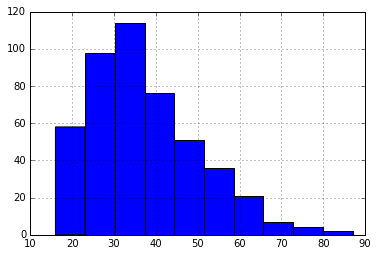

In [248]:
# 10. Display a histogram of ages of all killings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15ba84290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15d6b0550>]], dtype=object)

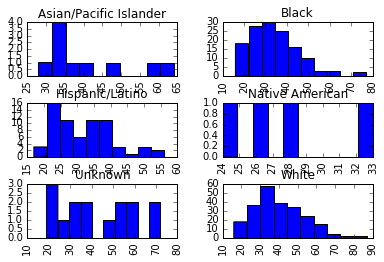

In [252]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [299]:
# 12. What is the average age of death by race?
byrace = killings.groupby(by='race').mean()
byage = byrace['age']
byage

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

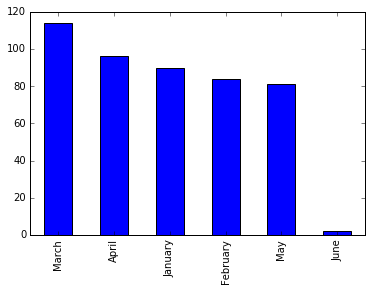

In [306]:
# 13. Show a bar chart with counts of deaths every month
months = killings['month'].value_counts()
months.plot(kind='bar')

In [307]:
###################
### Less Morbid ###
###################

In [328]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [330]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.columns = map(str.lower, majors.columns)
subjects = majors.drop('employed_full_time_year_round', 1).drop('major_code', 1)
subjects

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0


In [369]:
# 2. Show the cout of missing values in each column
undeclared = majors.isnull().sum()
undeclared

unnamed: 0                       0
major_code                       0
major                            0
major_category                   0
total                            0
employed                         0
employed_full_time_year_round    0
unemployed                       0
unemployment_rate                0
median                           0
p25th                            0
p75th                            0
dtype: int64

In [381]:
# 3. What are the top 10 highest paying majors?
earners = subjects.groupby(by="major").sum()
highearners = earners['median'].order('median', ascending=False).head(10)
highearners
#highearners = subjects.groupby('median')
#highearners

/Users/furankusu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


major
PETROLEUM ENGINEERING                                  125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000
METALLURGICAL ENGINEERING                               96000
NUCLEAR ENGINEERING                                     95000
MINING AND MINERAL ENGINEERING                          92000
MATHEMATICS AND COMPUTER SCIENCE                        92000
ELECTRICAL ENGINEERING                                  88000
CHEMICAL ENGINEERING                                    86000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING                  85000
Name: median, dtype: int64

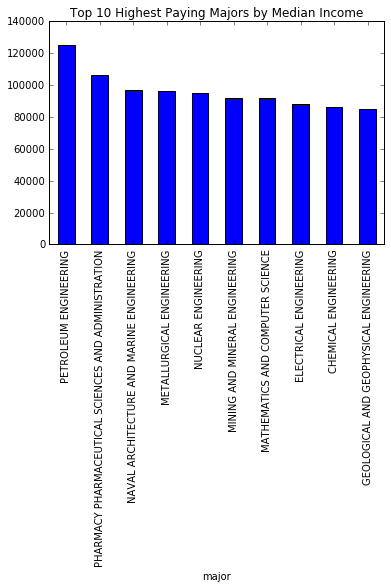

In [386]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
highearners.plot(kind='bar', x='Major', y='Median Income', title='Top 10 Highest Paying Majors by Median Income')

In [399]:
# 5. What is the average median salary for each major category?
majorsalary = subjects.groupby(by="major_category").mean()
majorsalary = majorsalary['median'].order('median', ascending=False)
majorsalary

/Users/furankusu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: median, dtype: float64

In [408]:
# 6. Show only the top 5 paying major categories
topsalary = majorsalary.head(5)
topsalary

major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: median, dtype: float64

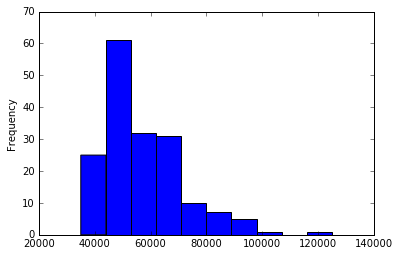

In [414]:
# 7. Plot a histogram of the distribution of median salaries
subjects['median'].plot(kind='hist')

major_category
Agriculture & Natural Resources        Axes(0.125,0.125;0.775x0.775)
Arts                                   Axes(0.125,0.125;0.775x0.775)
Biology & Life Science                 Axes(0.125,0.125;0.775x0.775)
Business                               Axes(0.125,0.125;0.775x0.775)
Communications & Journalism            Axes(0.125,0.125;0.775x0.775)
Computers & Mathematics                Axes(0.125,0.125;0.775x0.775)
Education                              Axes(0.125,0.125;0.775x0.775)
Engineering                            Axes(0.125,0.125;0.775x0.775)
Health                                 Axes(0.125,0.125;0.775x0.775)
Humanities & Liberal Arts              Axes(0.125,0.125;0.775x0.775)
Industrial Arts & Consumer Services    Axes(0.125,0.125;0.775x0.775)
Interdisciplinary                      Axes(0.125,0.125;0.775x0.775)
Law & Public Policy                    Axes(0.125,0.125;0.775x0.775)
Physical Sciences                      Axes(0.125,0.125;0.775x0.775)
Psychology & Social

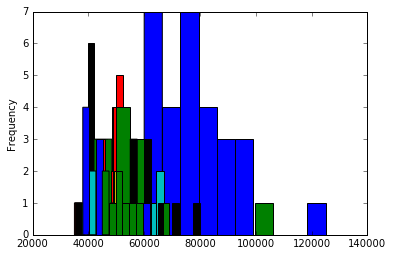

In [416]:
# 8. Plot a histogram of the distribution of median salaries by major category
catmedsal = subjects.groupby(by="major_category")
catmedsal['median'].plot(kind='hist')

In [434]:
# 9. What are the top 10 most UNemployed majors?
unemp = subjects.groupby(by="major").sum()
unemp = unemp['unemployed'].order('unemployed', ascending=False).head(10)
unemp

/Users/furankusu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: unemployed, dtype: int64

In [430]:
# What are the unemployment rates?
unemprates = subjects.groupby(by="major_category").mean()
unemprates = unemprates['unemployment_rate'].order('unemployment_rate', ascending=False)
unemprates

/Users/furankusu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Business                               0.054496
Engineering                            0.050630
Biology & Life Science                 0.049936
Health                                 0.047209
Education                              0.046762
Agriculture & Natural Resources        0.039569
Name: unemployment_rate, dtype: float64

In [433]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
unempcat = subjects.groupby(by="major_category").sum()
unempcat = unempcat['unemployed'].order('unemployed', ascending=False).head(10)
unempcat

/Users/furankusu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


major_category
Business                       434397
Humanities & Liberal Arts      179136
Engineering                    146389
Social Science                 132150
Education                      125336
Psychology & Social Work       104206
Arts                           104125
Communications & Journalism    101199
Computers & Mathematics         79974
Health                          75013
Name: unemployed, dtype: int64

In [441]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the employment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
import numpy as np
subjects['sample_employment_rate'] = np.divide(subjects['employed'], subjects['total'], dtype=float)
subjects

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0,0.793902
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0,0.747950
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0,0.747690
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0,0.825608
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0,0.694458


In [444]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
subjects['sample_unemployment_rate'] = np.subtract(1, subjects['sample_employment_rate'], dtype=float)
subjects

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000.0,0.793902,0.206098
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000.0,0.747950,0.252050
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000.0,0.747690,0.252310
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000.0,0.825608,0.174392
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000.0,0.694458,0.305542


In [578]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [579]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.columns = map(str.lower, businesses.columns)
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,taxcode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [580]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.columns = map(str.lower, inspections.columns)
inspections.head()

,business_id,score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [581]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.columns = map(str.lower, violations.columns)
violations.head()

,business_id,date,violationtypeid,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [626]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
restaurants = [businesses, violations, inspections]
restaurant_scores = pd.concat(restaurants, axis='business_certificate')
restaurant_scores

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,taxcode,business_certificate,...,owner_zip,business_id,date,violationtypeid,risk_category,description,business_id,score,date,type
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings,10.0,NaN,20140807.0,Reinspection/Followup
1,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,94109,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,10.0,94.0,20140729.0,Routine - Unscheduled
2,24.0,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,...,94104,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens,10.0,NaN,20140124.0,Reinspection/Followup
3,31.0,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,...,94133,10,20140729,103129,Moderate Risk,Insufficient hot water or running water,10.0,92.0,20140114.0,Routine - Unscheduled
4,45.0,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,...,94114,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils,19.0,94.0,20141110.0,Routine - Unscheduled
5,48.0,ART'S CAFE,747 IRVING St,SAN FRANCISCO,94122,37.764013,-122.465749,NaN,H24,318022.0,...,94122,19,20140214,103156,Low Risk,Permit license or inspection report not posted,19.0,94.0,20140214.0,Routine - Unscheduled
6,50.0,SUSHI ZONE,1815 Market St.,SF,94103,37.771437,-122.423892,+14155621114,H24,NaN,...,94112,19,20140214,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...,19.0,96.0,20130904.0,Routine - Unscheduled
7,54.0,RHODA GOLDMAN PLAZA,2180 POST St,S.F.,94115,37.784626,-122.437734,+14155345060,H24,417778.0,...,94115,19,20141110,103145,Low Risk,Improper storage of equipment utensils or linens,24.0,96.0,20160311.0,Routine - Unscheduled
8,56.0,CAFE X + O,1799 Church St,SF,94131,37.742325,-122.426476,+14155823535,H24,347603.0,...,94131,19,20141110,103116,Moderate Risk,Inadequate food safety knowledge or lack of ce...,24.0,96.0,20141124.0,Routine - Unscheduled
9,58.0,Oasis Grill,91 Drumm St,San Francisco,94111,37.794483,-122.396584,NaN,H24,954377.0,...,94111,19,20130904,103133,Moderate Risk,Foods not protected from contamination,24.0,96.0,20140612.0,Routine - Unscheduled


In [644]:
# 2 Which ten business have had the most inspections?
#inspected = restaurant_scores.groupby(by='name')
#inspected.sum()
import re
#inspect_count = restaurant_scores['business_certificate'].value_counts(dropna=True)
#restaurant_scores.name('inspect_count').head(10)
res_names = restaurant_scores['name']
inspected = res_names.str.lower().value_counts(dropna=True)
inspected.head(11)

# probably overcomplicating it, but i'd like to make a dictionary to assign a name to the business certificates -jf

peet's coffee & tea           23
starbucks coffee              21
starbucks                     16
san francisco soup company    11
walgreens                     10
lee's deli                    10
specialty's cafe & bakery      9
at&t park - food cart          9
subway sandwiches              8
mcdonald's                     8
juice shop                     7
Name: name, dtype: int64

In [646]:
# 3 Group and count the inspections by type
insptype = restaurant_scores['type'].value_counts()
insptype

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [647]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
monthly = restaurant_scores['month'].value_counts()
months.plot(kind='bar')

KeyError: 'month'

In [ ]:
# 5 Which zip code contains the most high risk violations?

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 What street has the best (safest) restaurants to dine out at?

In [ ]:
# 9 Create a hist of the scores with 10 bins

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/